<a href="https://colab.research.google.com/github/sisterme3/Data_Science/blob/master/NB10_Nashville_Housing_DayOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housing in Nashville/Davidson County

In [0]:
# Acquire the Nashville Housing Data from my GitHub repository
! git clone https://github.com/acreeg/NashvilleHousingData.git


Cloning into 'NashvilleHousingData'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [0]:
#import pandas for data analytics
import pandas as pd

# Read the data file into a pandas dataframe.
# Notice that we must indicate the full path of the data file.
# Name the dataframe houses_2009
filename = 'NashvilleHousingData/2009SINGLEFAMILYSF.txt'
houses_2009 = pd.read_csv(filename)

We can now view the first few rows using the `.head()` method. We can also inspect the last few rows using `.tail()`... or a sample of rows using .sample(n), where n = number of rows desired.

In [0]:
houses_2009.head(10)

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,FinishedArea
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.0
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.0
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.0
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.0
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.0
5,00200002400,GSD,10,226 EAST END RD,GOODLETTSVILLE,37072,41800.0,129800.0,171600.0,42900.0,1998.0
6,00200002401,GSD,10,231 EAST END RD,GOODLETTSVILLE,37072,28000.0,87800.0,115800.0,28950.0,2028.0
7,00200002700,RT,10,112 EAST END RD,GOODLETTSVILLE,37072,21000.0,119300.0,140300.0,35075.0,2627.0
8,00200003000001,RT,10,156 B EAST END RD,GOODLETTSVILLE,37072,37300.0,122600.0,159900.0,39975.0,1830.0
9,00200003100,RT,10,148 EAST END RD,GOODLETTSVILLE,37072,21000.0,14300.0,35300.0,8825.0,693.0


Now, let's look at the column names:

In [0]:
houses_2009.columns

Index(['APN', 'DistrictCode', 'Council District', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', '2009 LAND', '2009 IMPR',
       '2009 TOTAL APPR', '2009 TOTAL ASSD', 'FinishedArea'],
      dtype='object')

... and the DistrictCode values

In [0]:
houses_2009['DistrictCode'].unique()

array(['RT  ', 'GSD ', 'GO  ', 'USD ', 'LW  ', 'CBID', 'GBID', 'BH  ',
       'BM  ', 'OH  ', 'FH  '], dtype=object)

An assessor's parcel number, or APN, is a number assigned to parcels of real property by the tax assessor of a particular jurisdiction for purposes of identification and record-keeping.

DistrictCode: GSD (General Service District), RT (RidgeTop), USD (Urban Service District), GO (Goodlettsville), LW (Lakewood), CBID (Central Business Improvement District), GBID (Gulch Business Improvement District), BH (Berry Hill), BM (Belle Meade), OH (Oak Hill), FH (Forrest Hills)

LAND: Land appraisal

IMPR: Improvements appraisal

TOTAL APPR: LAND + IMPR

an estimate of market value based on established set of tables, manuals, and procedures mandated by state statute to provide equal treatment of all properties in the jurisdiction for tax purposes.

TOTAL ASSD: Assessed value for tax purposes
calculated by multiplying the appraised value by the assessment ratio. The assessment ratio for each different classification of property is established by Tennessee Constitution Art.2, § 28 and TCA § 67-5-801 state law as follows:

Residential/Farm	25%	Commercial/Industrial	30%
Commercial/Industrial	40%	Public Utility	55%

Finished Area: In square feet

We can check the dimensions of our DataFrame using `.shape`. This returns a tuple (number of rows, number of columns).

In [0]:
houses_2009.shape

(183406, 11)

The method `.info()` gives us more information about each column.

Notice the number of non-null objects in each column!!!

In [0]:
houses_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183406 entries, 0 to 183405
Data columns (total 11 columns):
APN                   183406 non-null object
DistrictCode          183406 non-null object
Council District      183406 non-null int64
AddressFullAddress    183406 non-null object
AddressCity           183406 non-null object
AddressPostalCode     183406 non-null int64
2009 LAND             183406 non-null float64
2009 IMPR             183406 non-null float64
2009 TOTAL APPR       183406 non-null float64
2009 TOTAL ASSD       183406 non-null float64
FinishedArea          183406 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.4+ MB


Let's adjust the column names. It is a lot easier to work with columns that do not have spaces or start with a number.

In [0]:
houses_2009.columns = ['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea']
houses_2009.columns

Index(['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea'],
      dtype='object')

Now, let's read in the 2013 and 2017 files and change the column names in the same way as for the 2009 file.

In [0]:
houses_2013 = pd.read_csv('NashvilleHousingData/2013SINGLEFAMILYSF.txt')
houses_2017 = pd.read_csv('NashvilleHousingData/2017SINGLEFAMILYSF.txt')
houses_2013.columns = ['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea']
houses_2017.columns = ['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea']



We can access a column in the following way:

df['column_name']

In [0]:
houses_2009['AddressCity']

0         GOODLETTSVILLE
1         GOODLETTSVILLE
2         GOODLETTSVILLE
3         GOODLETTSVILLE
4         GOODLETTSVILLE
               ...      
183401       NOLENSVILLE
183402       NOLENSVILLE
183403       NOLENSVILLE
183404       NOLENSVILLE
183405       NOLENSVILLE
Name: AddressCity, Length: 183406, dtype: object

If we want to see the different entries for a column, we can use the `.unique()` method:

In [0]:
houses_2009['AddressCity'].unique()

array(['GOODLETTSVILLE', 'JOELTON', 'WHITES CREEK', 'MADISON',
       'NASHVILLE', 'OLD HICKORY', 'ASHLAND CITY', 'HERMITAGE', 'PEGRAM',
       'MOUNT JULIET', 'ANTIOCH', 'BELLEVUE', 'BRENTWOOD', 'LAVERGNE',
       'FRANKLIN', 'NOLENSVILLE'], dtype=object)

The `.value_counts()` method will give a tally of the entries in a particular column, sorted in descending order by default. For example, let's say we want to get a tally of homes by city.

In [0]:
houses_2009['AddressCity'].value_counts()

NASHVILLE         126590
ANTIOCH            20028
MADISON             9675
HERMITAGE           9615
OLD HICKORY         5267
BRENTWOOD           4534
GOODLETTSVILLE      4275
JOELTON             1479
WHITES CREEK        1173
NOLENSVILLE          278
PEGRAM               174
ASHLAND CITY         160
MOUNT JULIET         128
FRANKLIN              24
LAVERGNE               3
BELLEVUE               3
Name: AddressCity, dtype: int64

### Filtering

Let's find all homes in Goodlettsville. Start by creating a boolean array.

We can consider the following to be stating that (or asking whether or not) each specific row of the dataframe has 

houses_2009['AddressCity'] == 'GOODLETTSVILLE'

The response is True or False

In [0]:
houses_2009['AddressCity'] == 'GOODLETTSVILLE'

0          True
1          True
2          True
3          True
4          True
          ...  
183401    False
183402    False
183403    False
183404    False
183405    False
Name: AddressCity, Length: 183406, dtype: bool

Then locate the rows (within the dataframe) that give a response of True

In [0]:
houses_2009[houses_2009['AddressCity'] == 'GOODLETTSVILLE']

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.00000
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.00000
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.00000
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.00000
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.00000
...,...,...,...,...,...,...,...,...,...,...,...
7632,03413020300,GO,10,403 JANETTE CT,GOODLETTSVILLE,37072,27000.0,94900.0,121900.0,30475.0,1025.00000
7633,03413020400,GO,10,405 JANETTE CT,GOODLETTSVILLE,37072,27000.0,92600.0,119600.0,29900.0,1025.00000
7634,03413020500,GO,10,407 JANETTE CT,GOODLETTSVILLE,37072,27000.0,93200.0,120200.0,30050.0,1025.00000
7635,03413020600,GO,10,409 JANETTE CT,GOODLETTSVILLE,37072,31000.0,100700.0,131700.0,32925.0,1361.00000


We can slice our DataFrame using a boolean series as before, but we can also use `.loc`  (locate) to slice by passing which index values we want (row, column, or both). This looks like `df.loc[<rows>,<columns>]`

houses_2009.loc[100:105,['AddressFullAddress', 'AddressCity']] 

selects rows 100 - 105 with only the specified columns

In [0]:
houses_2009.loc[100:105,['AddressFullAddress', 'AddressCity']]

,AddressFullAddress,AddressCity
100,8121 LAIN HOLLOW RD,JOELTON
101,8158 LAIN HOLLOW RD,JOELTON
102,8180 WHITES CREEK PIKE,JOELTON
103,8184 WHITES CREEK PIKE,JOELTON
104,8188 WHITES CREEK PIKE,JOELTON
105,8192 WHITES CREEK PIKE,JOELTON


In [0]:
houses_2009.loc[1000]

APN                       01400007800
DistrictCode                     GSD 
CouncilDistrict                     1
AddressFullAddress    7401 BIDWELL RD
AddressCity                   JOELTON
AddressPostalCode               37080
LAND                            72500
IMPR                           137700
TOTALAPPR                      210200
TOTALASSD                       52550
FinishedArea                   2316.6
Name: 1000, dtype: object

What is the datatype of the result of the previous cell?

How would you characterize the difference in the objects from the previous cell?

Time for some plots! Let's look at the number of single family homes assessed in each district. 

Plotting can be done using pandas DataFrame methods. Behind the scenes, this is done using the matplotlib library. In order to get our plots to display in our notebook, we can use the ipython magic command `%matplotlib inline`.

In [0]:
# import a python visualization package - matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

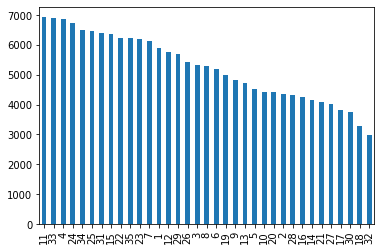

In [0]:
houses_2009['CouncilDistrict'].value_counts().plot.bar();

The plots we create are highly customizable. For a (partial) list of stylistic options, see https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html.

Text(0.5, 1.0, 'Number of Single-Family Homes by ???, 2009')

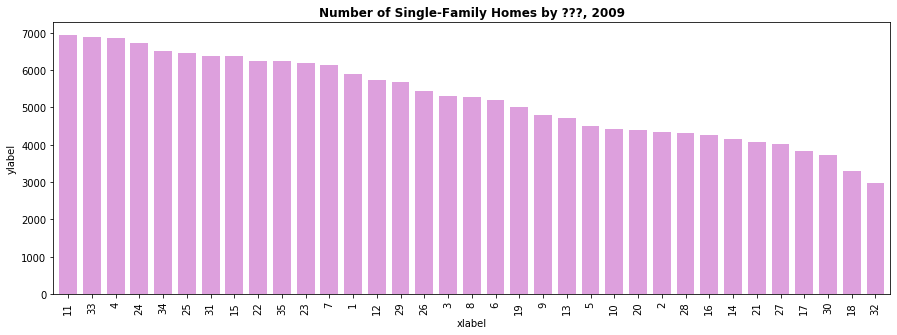

In [0]:
fig = houses_2009['CouncilDistrict'].value_counts().plot.bar(figsize = (15,5), width = .75,
                                                         color = 'plum')
fig.set_xlabel('xlabel')
fig.set_ylabel('ylabel')
fig.set_title('Number of Single-Family Homes by ???, 2009', fontweight = 'bold')

The `.plot` method orders the bars in descending order by default. If we want to change the order, say in order by district number, we can reorder the rows of our DataFrame by using range() as we did with the website data.

In [0]:
for i in range(1,10):
  print(i)

1
2
3
4
5
6
7
8
9


In [0]:
houses_2009['CouncilDistrict'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

In [0]:
houses_2009['CouncilDistrict'].value_counts().loc[range(1,36)]

1     5906
2     4342
3     5315
4     6856
5     4511
6     5201
7     6144
8     5280
9     4810
10    4431
11    6935
12    5745
13    4722
14    4151
15    6378
16    4271
17    3826
18    3295
19    4998
20    4406
21    4076
22    6239
23    6192
24    6737
25    6461
26    5433
27    4032
28    4305
29    5679
30    3738
31    6384
32    2971
33    6895
34    6507
35    6234
Name: CouncilDistrict, dtype: int64

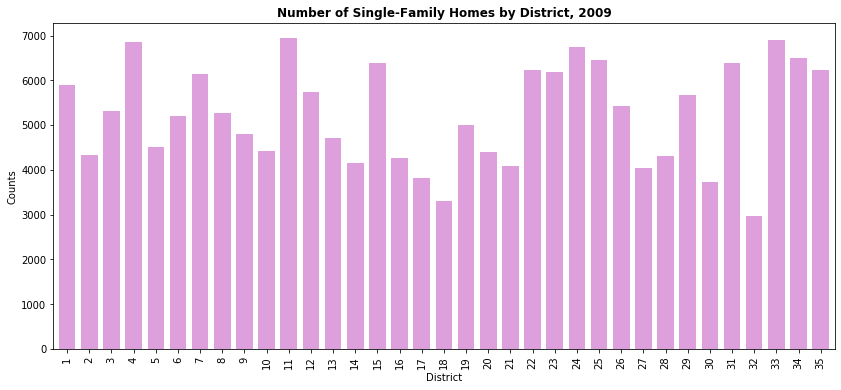

In [0]:
fig = houses_2009['CouncilDistrict'].value_counts().loc[range(1,36)].plot.bar(figsize = (14,6), width = 0.75,
                                                         color = 'plum')
fig.set_xlabel('District')
fig.set_ylabel('Counts')
fig.set_title('Number of Single-Family Homes by District, 2009', fontweight = 'bold');

If we want to display the distribution of a variable, we can use a histogram. For example, let's say we want to look at the distribution of FinishedArea in square feet.

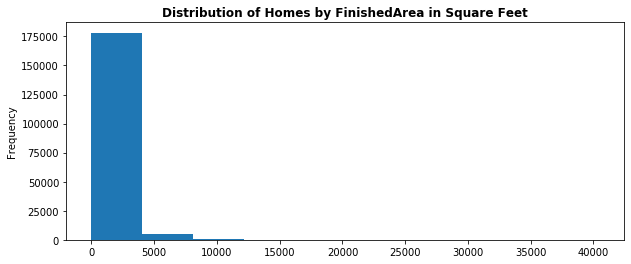

In [0]:
fig = houses_2009['FinishedArea'].plot.hist(figsize = (10,4))
fig.set_title('Distribution of Homes by FinishedArea in Square Feet', fontweight = 'bold');

We get some extreme square footages - let's investigate.

Let's narrow down the dataset we use in order to get a more informative histogram. Notice too that we can adjust the number of bins to further improve the histogram.

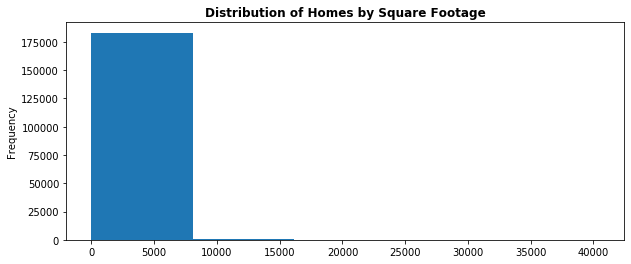

In [0]:
houses_2009.loc[houses_2009['FinishedArea'] < 50000]['FinishedArea'].plot.hist(figsize = (10,4), bins = 5)
plt.title('Distribution of Homes by Square Footage', fontweight = 'bold');

In [0]:
# Use .describe() to help determine the distribution of Finished area
houses_2009['FinishedArea'].describe()

count    183406.000000
mean       1781.970022
std         989.135767
min           0.000000
25%        1164.000000
50%        1540.000000
75%        2105.500000
max       40418.000000
Name: FinishedArea, dtype: float64

We can also put two histograms on the same plot in order to compare two distributions. Let's say we want to compare the distribution of appraisal values from 2009 to 2017.

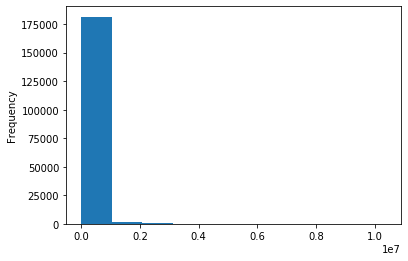

In [0]:
houses_2009['TOTALAPPR'].plot.hist();

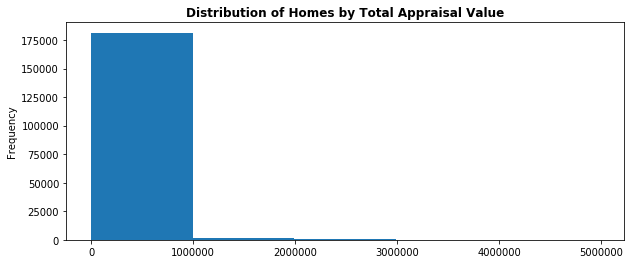

In [0]:
houses_2009.loc[houses_2009['TOTALAPPR'] < 5000000]['TOTALAPPR'].plot.hist(figsize = (10,4), bins = 5)
plt.title('Distribution of Homes by Total Appraisal Value', fontweight = 'bold');

In order to determine a good cutoff, we can use the `.describe()` method which gives summary statistics on our DataFrame.

In [0]:
houses_2009['TOTALAPPR'].describe()

count    1.834060e+05
mean     2.014891e+05
std      2.229380e+05
min      1.400000e+03
25%      1.077000e+05
50%      1.452000e+05
75%      2.199000e+05
max      1.037700e+07
Name: TOTALAPPR, dtype: float64

We can see that 75% of homes are appraised at \$220,000 or less.

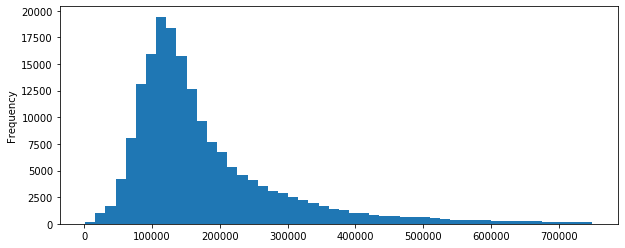

In [0]:
houses_2009.loc[houses_2009['TOTALAPPR'] <= 750000]['TOTALAPPR'].plot.hist(figsize = (10,4), bins = 50);

With two histograms, we should set the alpha values lower to increase the transparency. It is also probably a good idea to normalize our histograms so they they are showing densities rather than counts.

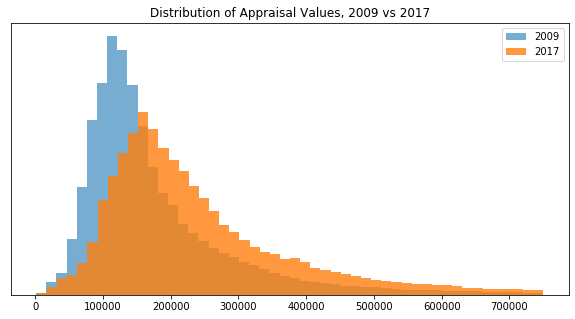

In [0]:
fig = houses_2009.loc[houses_2009['TOTALAPPR'] <= 750000]['TOTALAPPR'].plot.hist(bins = 50, alpha = 0.6, density = True, label = '2009', figsize = (10,5))
houses_2017.loc[houses_2017['TOTALAPPR'] <= 750000]['TOTALAPPR'].plot.hist(bins = 50, alpha = 0.8, density = True, label = '2017');
fig.axes.get_yaxis().set_visible(False)
fig.set_title('Distribution of Appraisal Values, 2009 vs 2017');
fig.legend();